In [193]:
# Import the required libraries

import numpy as np
%pip install plotly==5.8.0
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from google.colab import files
%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

In [194]:
# Webscraping to excel method is used to scrap the dataset from link https://alternative-fuels-observatory.ec.europa.eu/consumer-portal/available-electric-vehicle-models.
# After webscraping the dataset structure it by various methods and save. Now load the dataset in the google colab.
#Data consists of
#1. Categorical column-Brand, Model
#2. DateTime Column-Available from
#3. Numeric Column-Range_km,Battery size_kWh,Efficiency_kWh/100km,Fastcharge speed_km/h,Price (inEuro)
data=pd.read_excel("/content/ev file60.xlsx")

In [195]:
data

,Brand,Model,Available from,Range_km,Battery size_kWh,Efficiency_kWh/100km,Fastcharge speed_km/h,Price (inEuro)
0,Abarth 500e,Convertible,2023-05-01,225,37.8000,17,370.0000,41200
1,Abarth 500e,Hatchback,2023-05-01,225,37.8000,17,370.0000,38200
2,Aiways,U5,2022-04-01,315,60.0000,19,380.0000,41300
3,Aiways,U6,2022-12-01,350,60.0000,17,430.0000,48300
4,Audi,e-tron GT quattro,2021-03-01,420,85.0000,20,1030.0000,108600
5,Audi,e-tron GT RS,2021-03-01,405,85.0000,21,1000.0000,150400
6,Audi,Q4 e-tron 35,2021-06-01,285,52.0000,18,360.0000,48400
7,Audi,Q4 e-tron 40,2021-06-01,405,76.6000,19,630.0000,55700
8,Audi,Q4 e-tron 45 quattro,2021-08-01,385,76.6000,20,550.0000,57700
9,Audi,Q4 e-tron 50 quattro,2021-07-01,385,76.6000,20,550.0000,64500


In [196]:
# Print the top 5 rows of dataset
data.head(5)

,Brand,Model,Available from,Range_km,Battery size_kWh,Efficiency_kWh/100km,Fastcharge speed_km/h,Price (inEuro)
0,Abarth 500e,Convertible,2023-05-01,225,37.8000,17,370.0000,41200
1,Abarth 500e,Hatchback,2023-05-01,225,37.8000,17,370.0000,38200
2,Aiways,U5,2022-04-01,315,60.0000,19,380.0000,41300
3,Aiways,U6,2022-12-01,350,60.0000,17,430.0000,48300
4,Audi,e-tron GT quattro,2021-03-01,420,85.0000,20,1030.0000,108600


In [197]:
# Finding the shape (rows,columns)
data.shape

(60, 8)

In [198]:
# Info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Brand                  60 non-null     object        
 1   Model                  60 non-null     object        
 2   Available from         60 non-null     datetime64[ns]
 3   Range_km               60 non-null     int64         
 4   Battery size_kWh       60 non-null     float64       
 5   Efficiency_kWh/100km   60 non-null     int64         
 6   Fastcharge speed_km/h  59 non-null     float64       
 7   Price (inEuro)         60 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 3.9+ KB


In [199]:
# Statistics of the dataset
data.describe()

,Range_km,Battery size_kWh,Efficiency_kWh/100km,Fastcharge speed_km/h,Price (inEuro)
count,60.0000,60.0000,60.0000,59.0000,60.0000
mean,347.1667,67.7233,19.7000,499.1525,65176.6667
std,111.6569,23.0084,3.1424,188.9653,32414.3898
min,135.0000,21.3000,15.0000,170.0000,22200.0000
25%,263.7500,49.6750,17.0000,350.0000,43525.0000
50%,355.0000,68.0000,19.0000,470.0000,57600.0000
75%,433.7500,82.1500,21.0000,630.0000,73825.0000
max,525.0000,106.0000,26.0000,1030.0000,185800.0000


In [200]:
# Find the null values
data.isnull().sum()

Brand                    0
Model                    0
Available from           0
Range_km                 0
Battery size_kWh         0
Efficiency_kWh/100km     0
Fastcharge speed_km/h    1
Price (inEuro)           0
dtype: int64

In [201]:
# Fill the null values
data['Fastcharge speed_km/h'].fillna(0,inplace=True)

In [202]:
# Reload the dataset
data

,Brand,Model,Available from,Range_km,Battery size_kWh,Efficiency_kWh/100km,Fastcharge speed_km/h,Price (inEuro)
0,Abarth 500e,Convertible,2023-05-01,225,37.8000,17,370.0000,41200
1,Abarth 500e,Hatchback,2023-05-01,225,37.8000,17,370.0000,38200
2,Aiways,U5,2022-04-01,315,60.0000,19,380.0000,41300
3,Aiways,U6,2022-12-01,350,60.0000,17,430.0000,48300
4,Audi,e-tron GT quattro,2021-03-01,420,85.0000,20,1030.0000,108600
5,Audi,e-tron GT RS,2021-03-01,405,85.0000,21,1000.0000,150400
6,Audi,Q4 e-tron 35,2021-06-01,285,52.0000,18,360.0000,48400
7,Audi,Q4 e-tron 40,2021-06-01,405,76.6000,19,630.0000,55700
8,Audi,Q4 e-tron 45 quattro,2021-08-01,385,76.6000,20,550.0000,57700
9,Audi,Q4 e-tron 50 quattro,2021-07-01,385,76.6000,20,550.0000,64500


In [203]:
# Recheck the null values
data.isnull().sum()

Brand                    0
Model                    0
Available from           0
Range_km                 0
Battery size_kWh         0
Efficiency_kWh/100km     0
Fastcharge speed_km/h    0
Price (inEuro)           0
dtype: int64

In [204]:
# Drop duplicates
df=data.drop_duplicates()
df

,Brand,Model,Available from,Range_km,Battery size_kWh,Efficiency_kWh/100km,Fastcharge speed_km/h,Price (inEuro)
0,Abarth 500e,Convertible,2023-05-01,225,37.8000,17,370.0000,41200
1,Abarth 500e,Hatchback,2023-05-01,225,37.8000,17,370.0000,38200
2,Aiways,U5,2022-04-01,315,60.0000,19,380.0000,41300
3,Aiways,U6,2022-12-01,350,60.0000,17,430.0000,48300
4,Audi,e-tron GT quattro,2021-03-01,420,85.0000,20,1030.0000,108600
5,Audi,e-tron GT RS,2021-03-01,405,85.0000,21,1000.0000,150400
6,Audi,Q4 e-tron 35,2021-06-01,285,52.0000,18,360.0000,48400
7,Audi,Q4 e-tron 40,2021-06-01,405,76.6000,19,630.0000,55700
8,Audi,Q4 e-tron 45 quattro,2021-08-01,385,76.6000,20,550.0000,57700
9,Audi,Q4 e-tron 50 quattro,2021-07-01,385,76.6000,20,550.0000,64500


In [205]:
# Count unique values
data.value_counts()

Brand        Model                           Available from  Range_km  Battery size_kWh  Efficiency_kWh/100km  Fastcharge speed_km/h  Price (inEuro)
Abarth 500e  Convertible                     2023-05-01      225       37.8000           17                    370.0000               41200             1
             Hatchback                       2023-05-01      225       37.8000           17                    370.0000               38200             1
BMW          iX3                             2021-09-01      385       74.0000           19                    520.0000               69400             1
BYD          ATTO 3                          2022-08-01      325       60.5000           19                    360.0000               43800             1
             DOLPHIN 60.4 kWh                2023-07-01      340       60.5000           18                    340.0000               36400             1
             HAN                             2023-03-01      475       85.4000   

In [206]:
# Count unique values and plot EDA
# Pie plot

Text(0.5, 1.0, 'Brand')

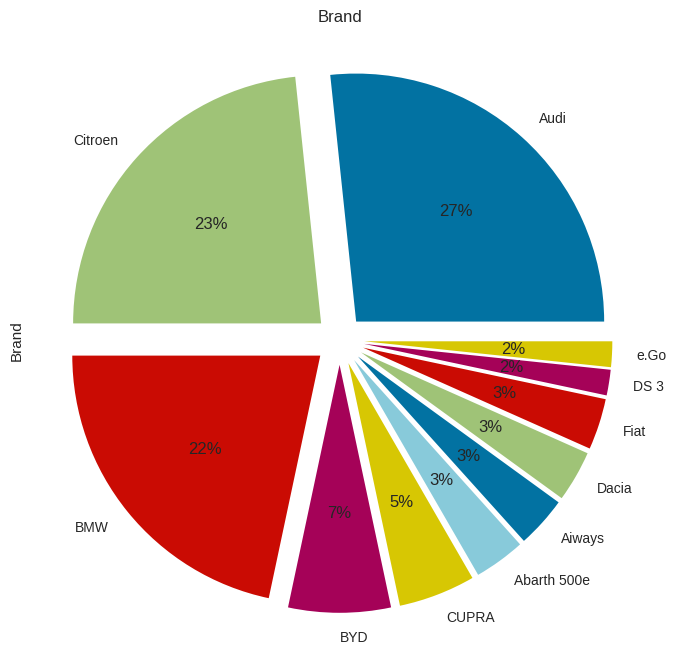

In [207]:
# Brand of Car
data['Brand'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Brand')

Text(0.5, 1.0, 'Model')

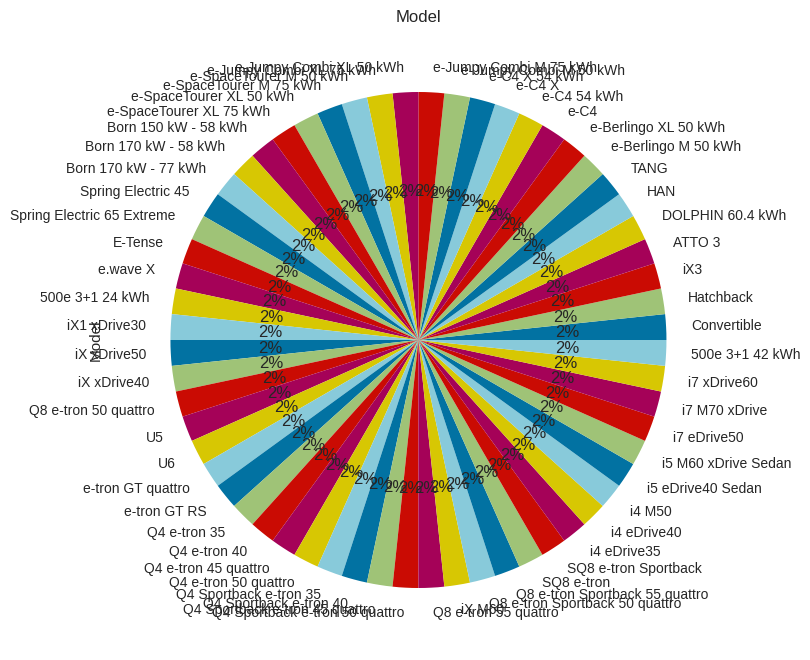

In [208]:
# EDA Model of Car
data['Model'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%')
plt.title('Model')

Text(0.5, 1.0, 'Available from')

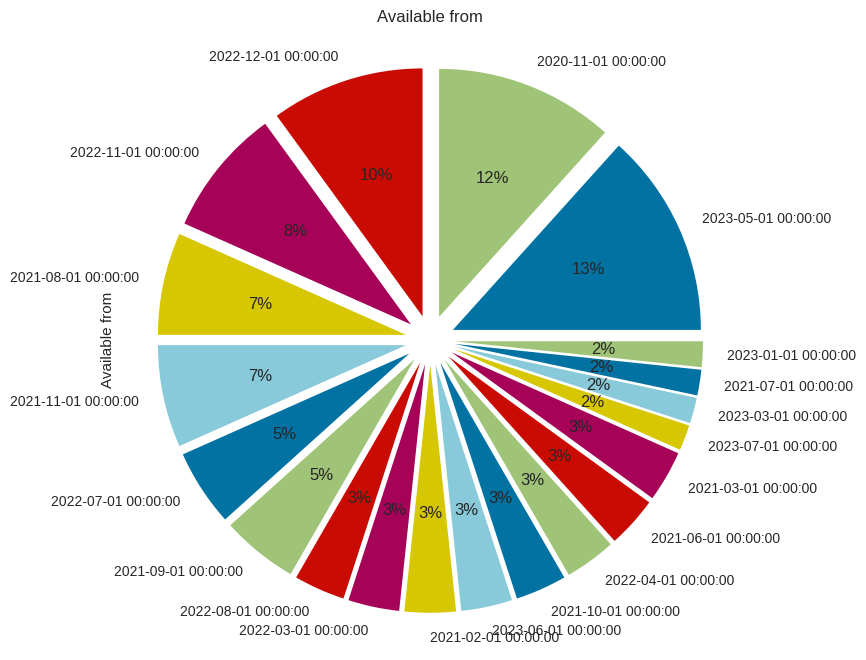

In [209]:
# Availability from of the Car
data['Available from'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Available from')

Text(0.5, 1.0, 'Battery Size')

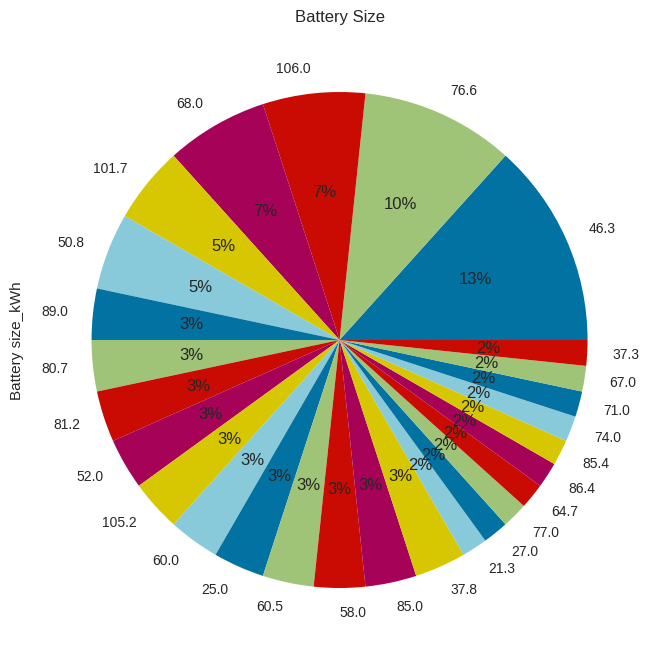

In [210]:
# Battery size of Car
data['Battery size_kWh'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%')
plt.title('Battery Size')

Text(0.5, 1.0, 'Efficiency')

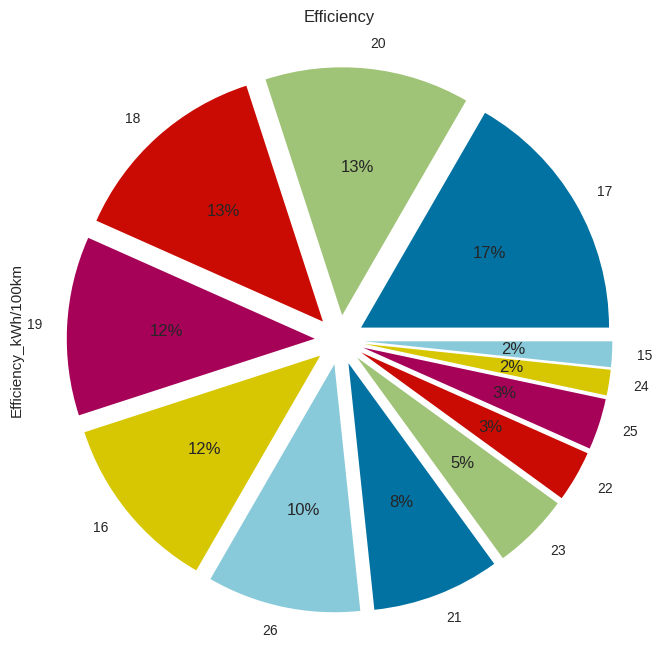

In [211]:
# Efficiency of Car
data['Efficiency_kWh/100km'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Efficiency')

Text(0.5, 1.0, 'Fastcharge Speed')

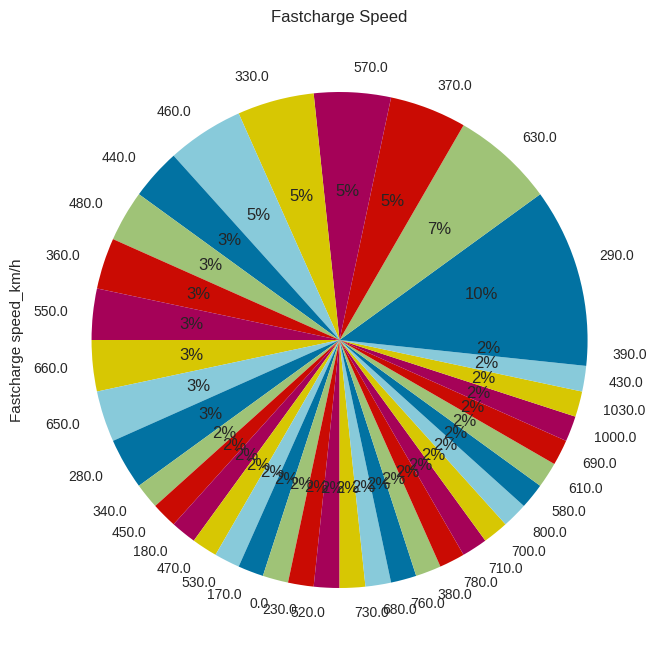

In [212]:
# Speed of Car
data['Fastcharge speed_km/h'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%')
plt.title('Fastcharge Speed')

Text(0.5, 1.0, 'Price (in Euro)')

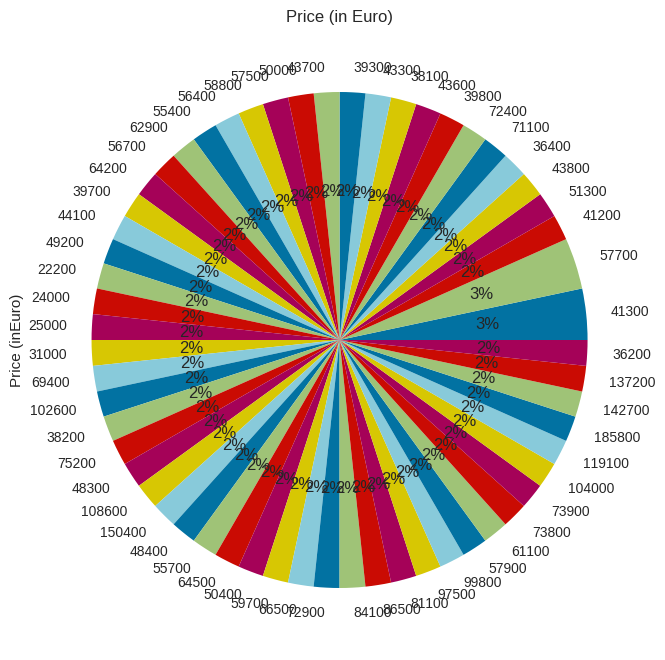

In [213]:
# Price of Car(in Euro)
data['Price (inEuro)'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%')
plt.title('Price (in Euro)')

Text(0.5, 1.0, 'Range')

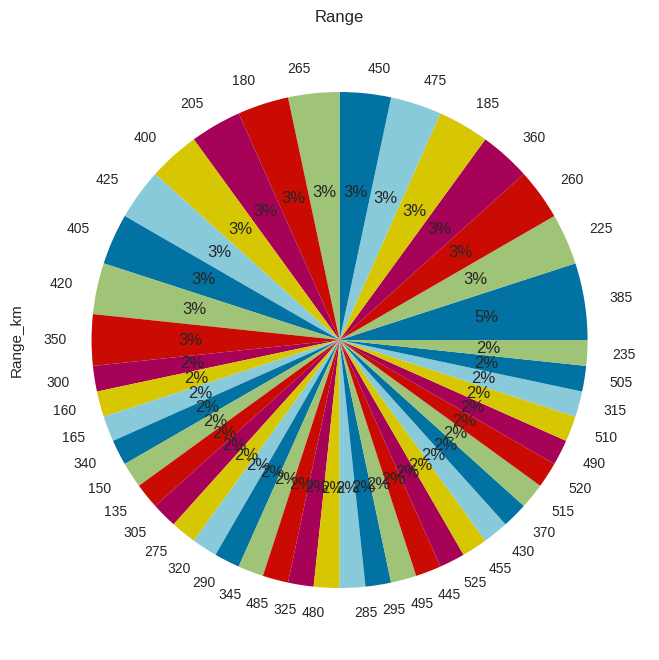

In [214]:
# Range of car
data['Range_km'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%')
plt.title('Range')

In [215]:
# Install Pandas-profiling

!pip install pandas-profiling

In [216]:
# Summarize the dataset
# Output.html report shows one-line EDA

from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [217]:
# EDA using Bar Plot

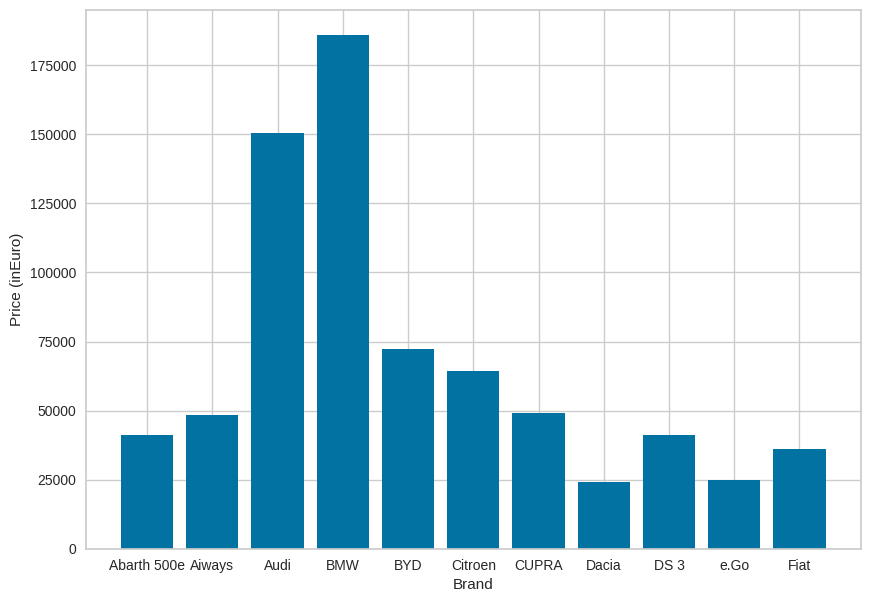

In [218]:
# EDA between Brand and Price
fig = plt.figure(figsize =(10, 7))
plt.bar(data['Brand'],data['Price (inEuro)'])
plt.xlabel('Brand')
plt.ylabel('Price (inEuro)')
plt.show()

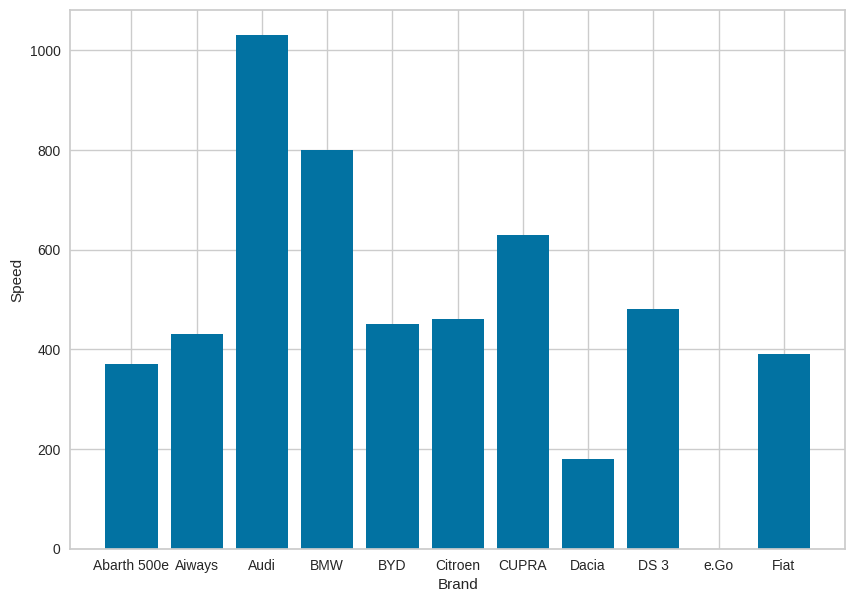

In [219]:
# EDA between Brand and Speed
fig = plt.figure(figsize =(10, 7))
plt.bar(data['Brand'],data['Fastcharge speed_km/h'])
plt.xlabel('Brand')
plt.ylabel('Speed')
plt.show()

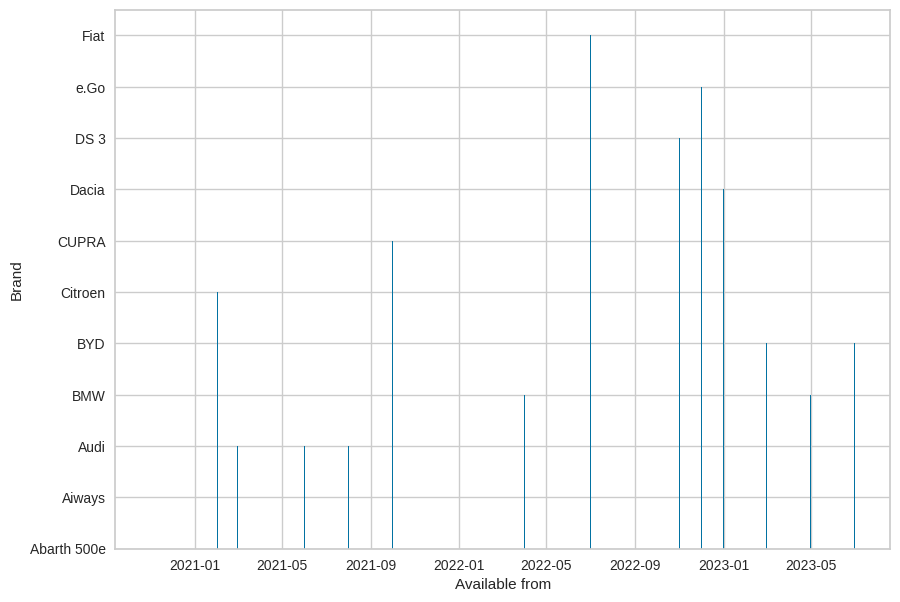

In [220]:
# EDA between Availability from and Brand
fig = plt.figure(figsize =(10, 7))
plt.bar(data['Available from'],data['Brand'])
plt.xlabel('Available from')
plt.ylabel('Brand')
plt.show()

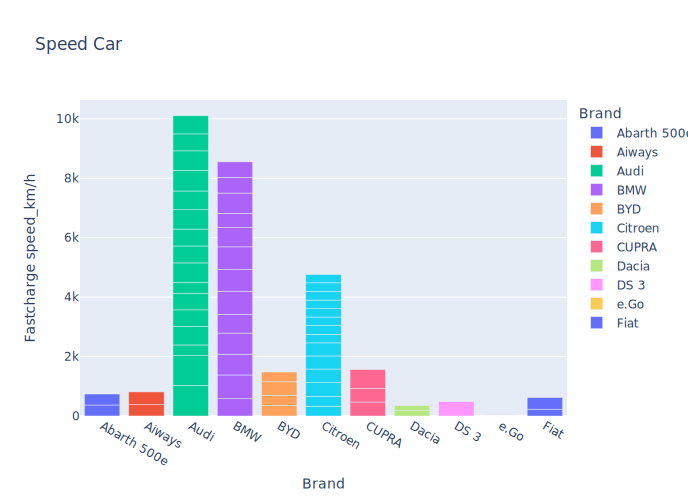

In [221]:
# Bar plot between Brand and Fastcharge speed_km/h
fig = px.bar(data,x='Brand',y = 'Fastcharge speed_km/h',color = 'Brand',title = 'Speed Car',labels = {'x':'Brand','y':'Fastcharge speed_km/h'})
pio.show(fig)

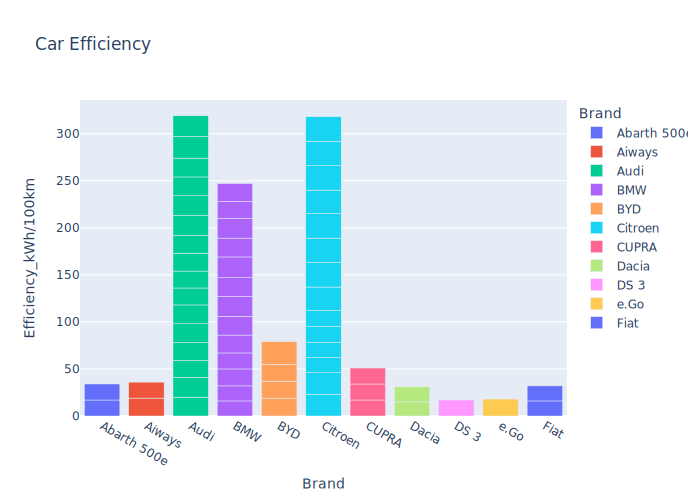

In [222]:
# Bar plot between Brand and Efficiency
fig = px.bar(df,x='Brand',y = 'Efficiency_kWh/100km',color = 'Brand',title = 'Car Efficiency',labels = {'x':'Car Brands','y':'Efficiency_kWh/100km'})
pio.show(fig)

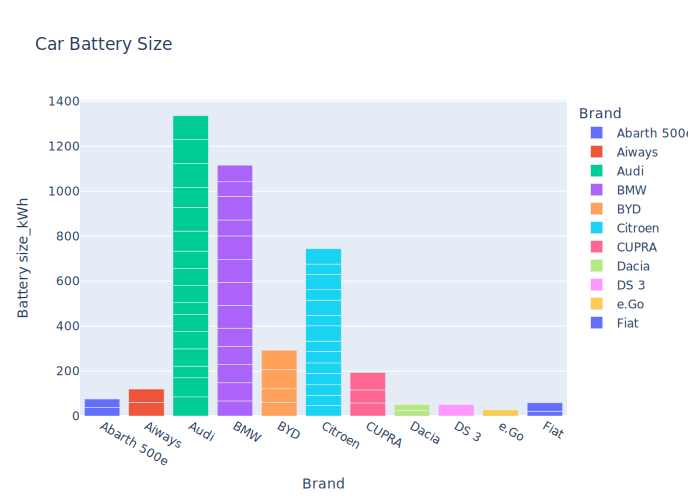

In [223]:
# Bar plot between Brand and Battery Size
fig = px.bar(data,x='Brand',y = 'Battery size_kWh',color = 'Brand',title='Car Battery Size',labels = {'x':'Car Brands','y':'Battery size_kWh'})
pio.show(fig)

<Axes: title={'center': 'Car Price'}, xlabel='Samples', ylabel='Car Price'>

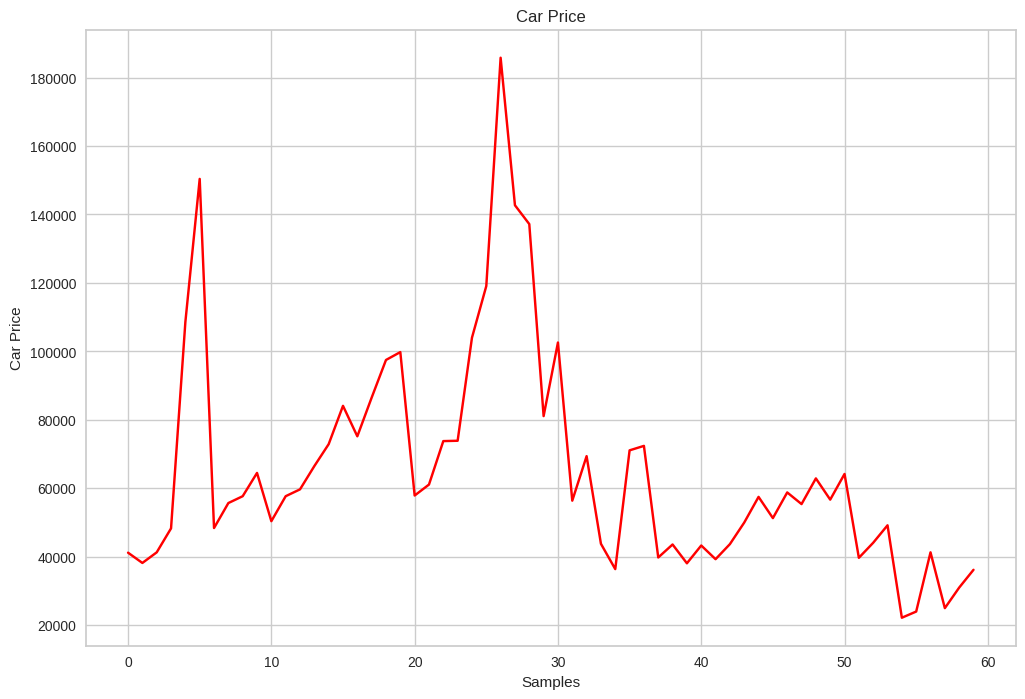

In [224]:
# EDA for Car Price
data['Price (inEuro)'].plot(figsize = (12,8),title='Car Price',xlabel = 'Samples',ylabel = 'Car Price',color = 'red')

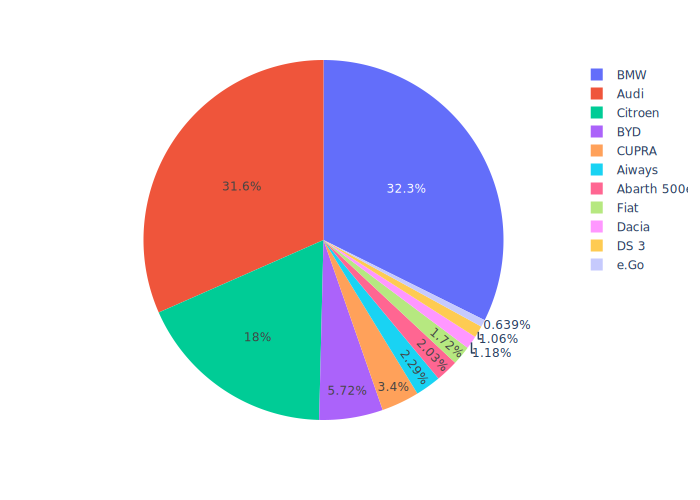

In [225]:
# Pie Plot Brand and Price
fig = px.pie(data,names = 'Brand',values = 'Price (inEuro)')
pio.show(fig)

<Axes: xlabel='Battery size_kWh', ylabel='count'>

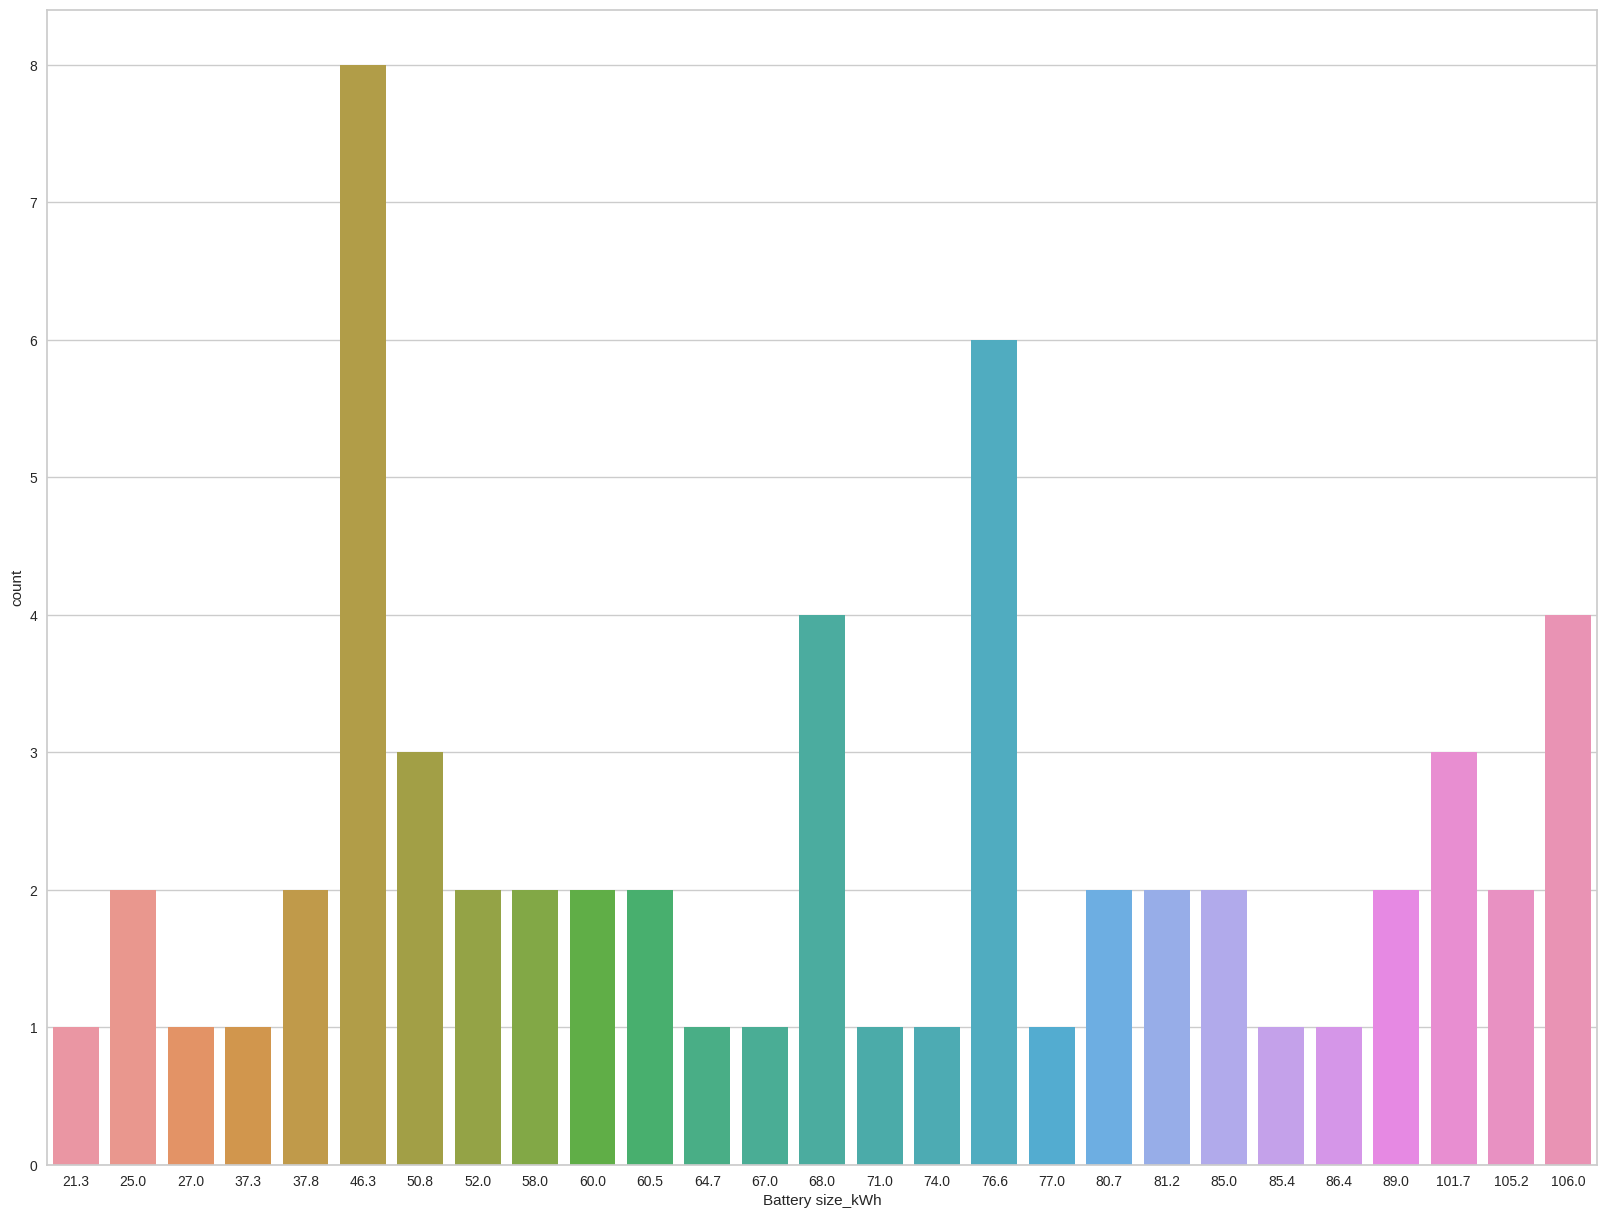

In [226]:
# Count plot Battery size
sns.countplot(x=data['Battery size_kWh'],data=data)

<Axes: xlabel='Brand', ylabel='count'>

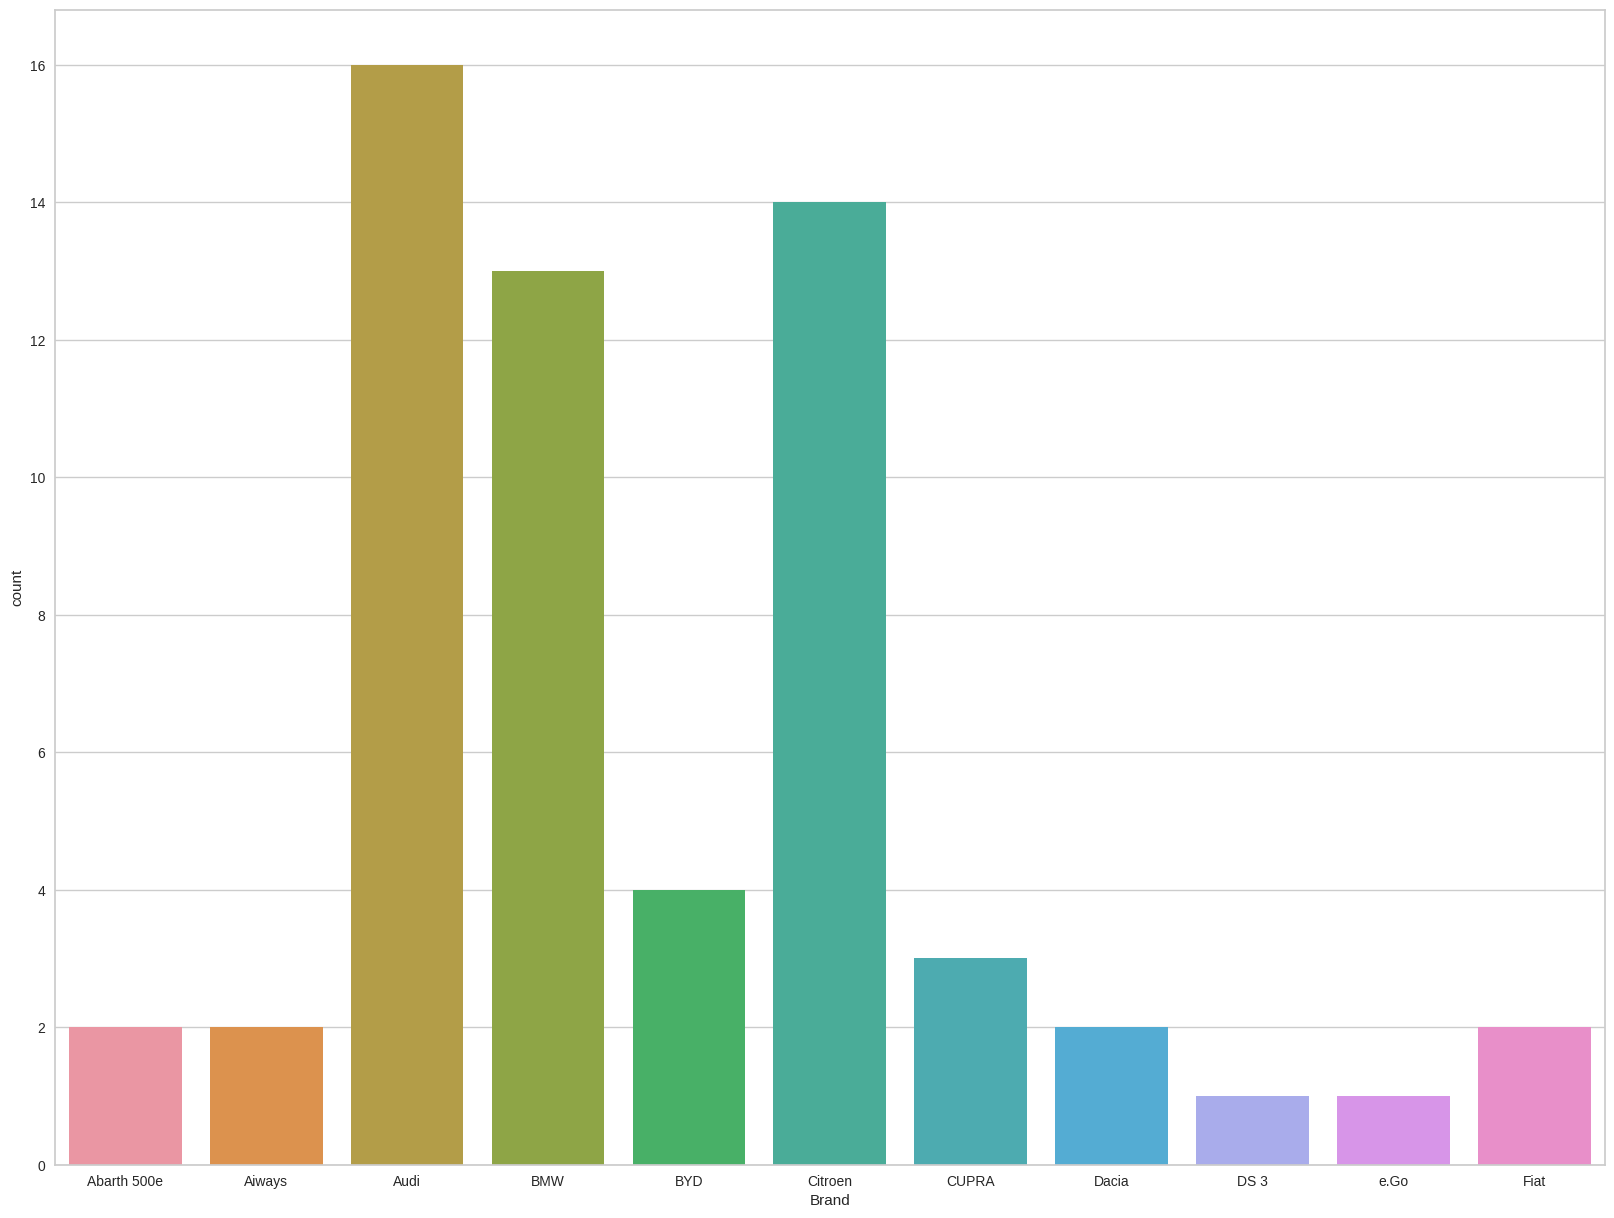

In [227]:
# Count plot Brand
sns.countplot(x=data['Brand'],data=data)

<Axes: xlabel='Range_km', ylabel='Price (inEuro)'>

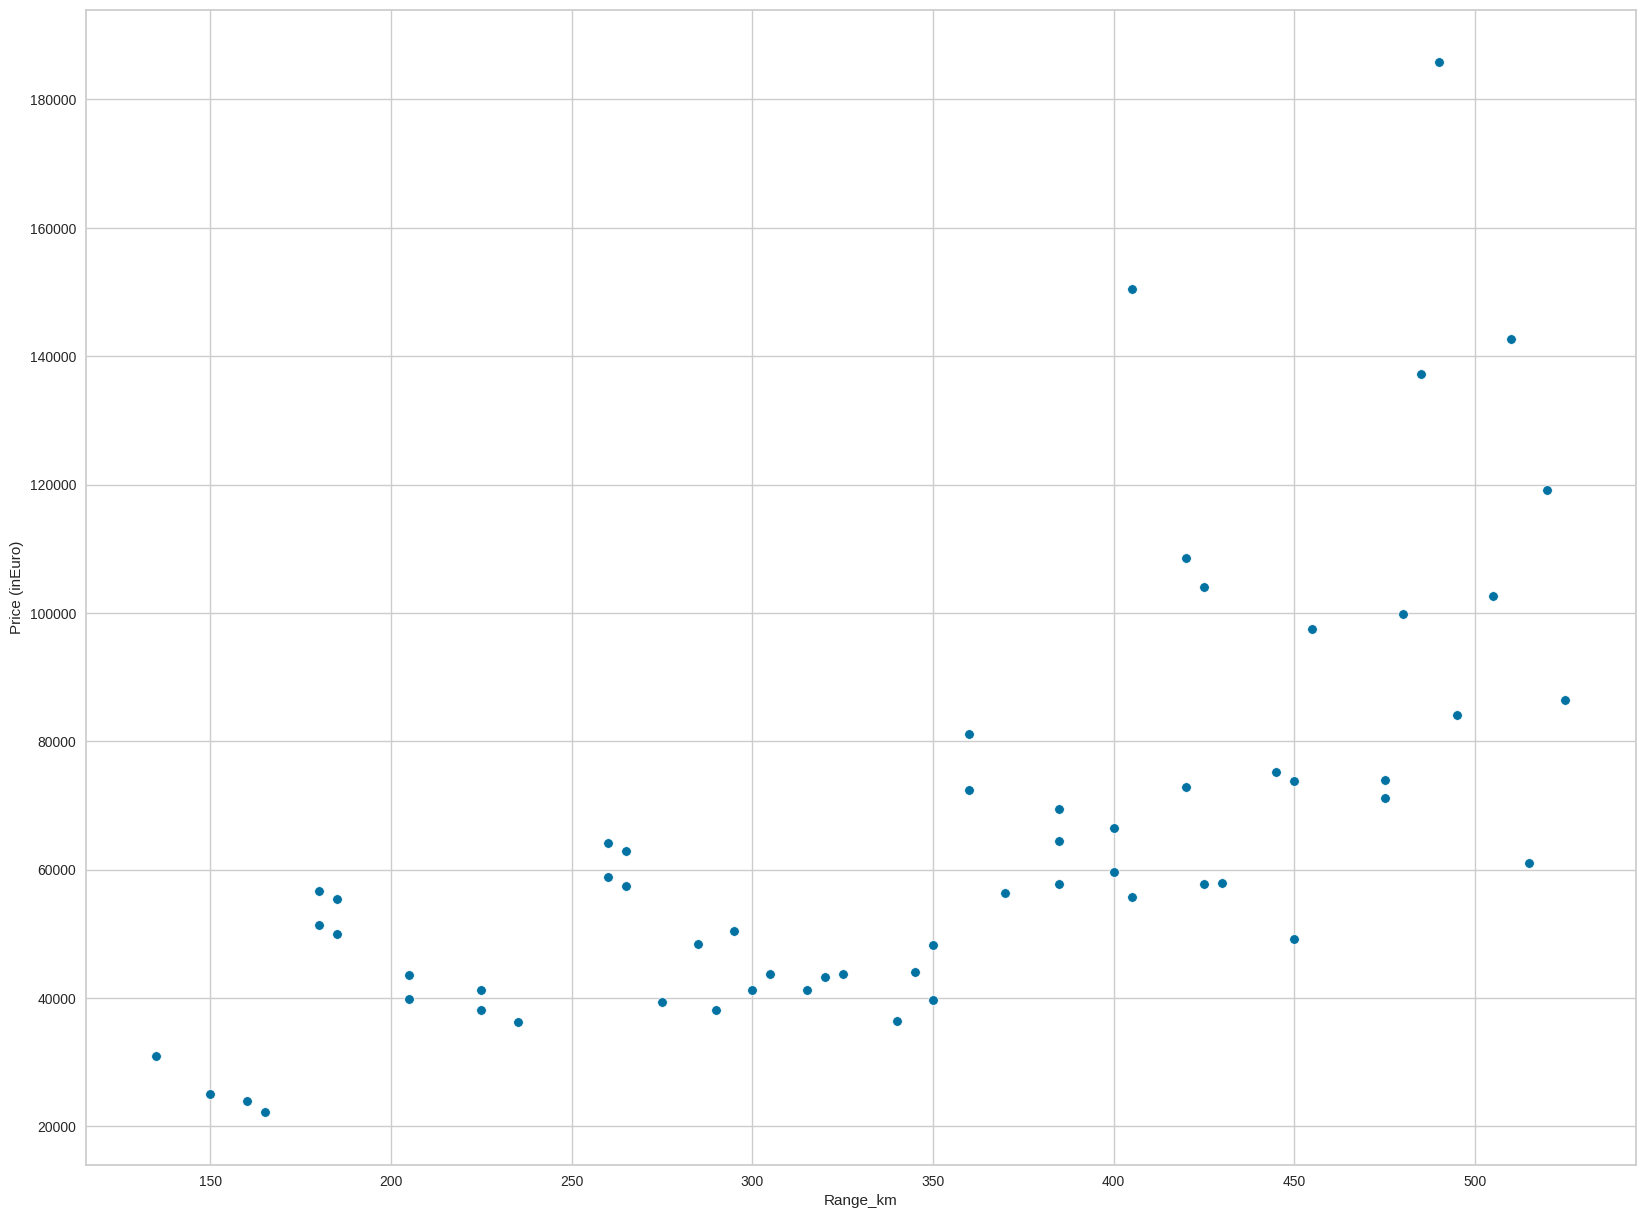

In [228]:
# Scatter plot between Range and Price
sns.scatterplot(data=data,x='Range_km',y='Price (inEuro)')

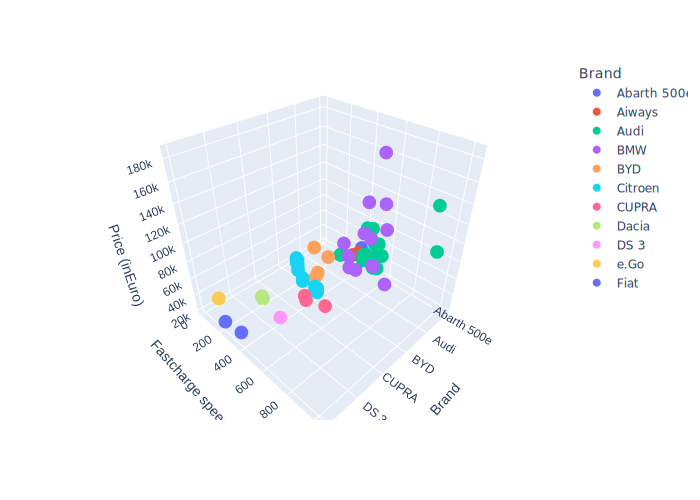

In [229]:
# 3d Scatter plot between Brand and Speed and Price
fig = px.scatter_3d(data,x = 'Brand',y = 'Fastcharge speed_km/h',z = 'Price (inEuro)',color='Brand')
pio.show(fig)

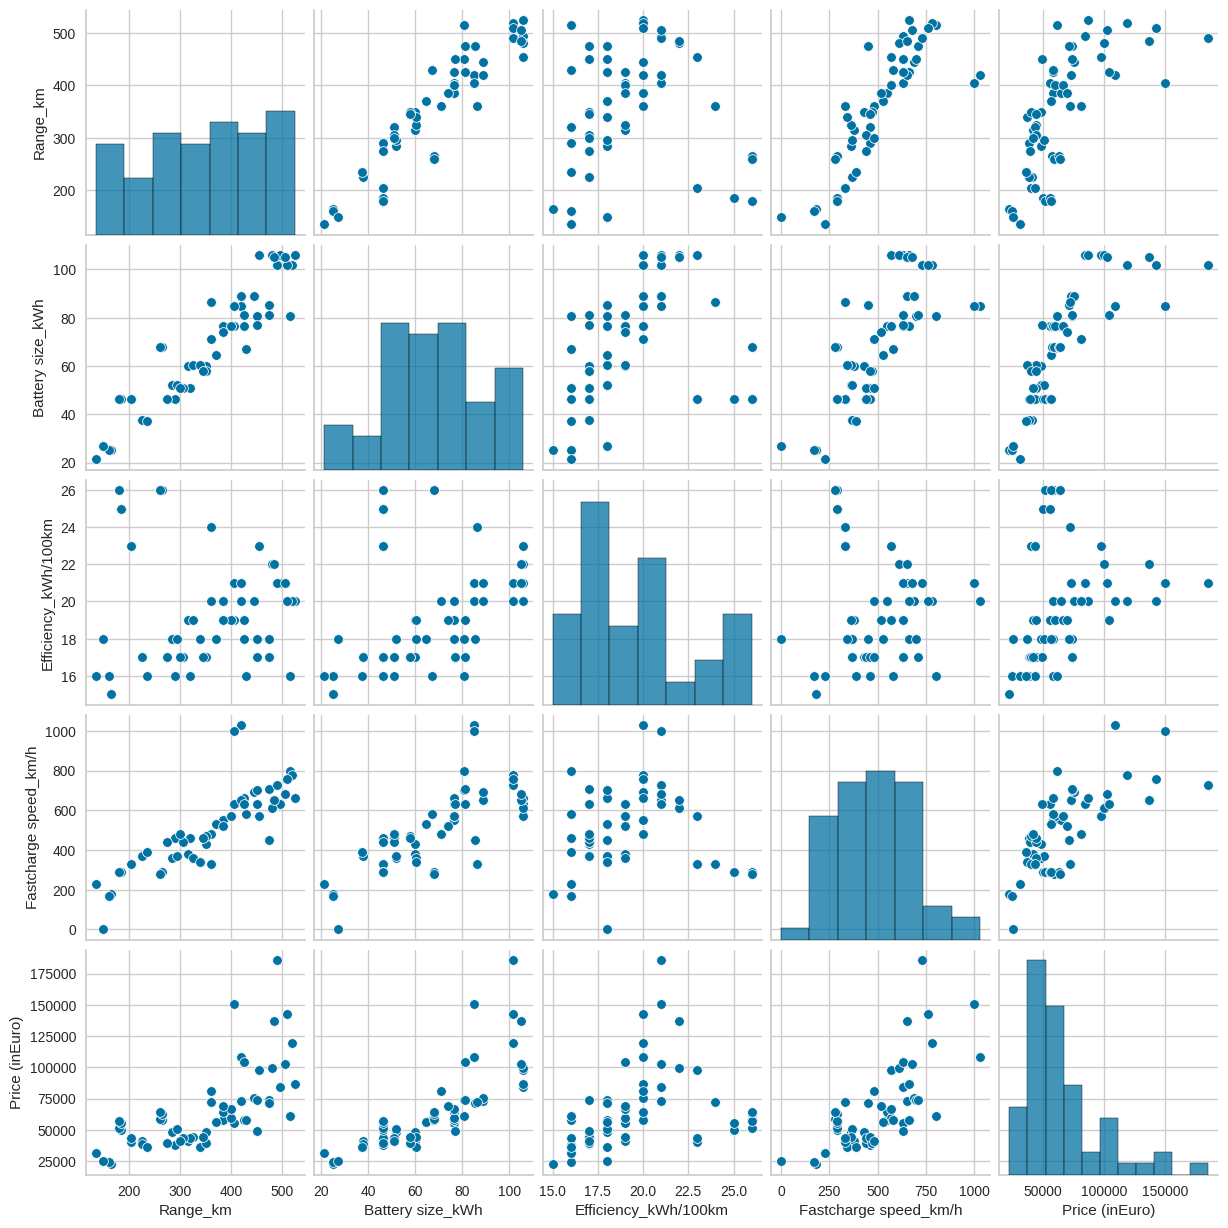

In [230]:
# Pair plot
sns.pairplot(data)

In [ ]:
# Pair plot
sns.pairplot(data,hue='Range_km')

In [ ]:
# Heatmap
ax= plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),linewidths=1,linecolor='white',annot=True)

In [ ]:
# Bar plot Speed of Car
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Fastcharge speed_km/h',data=data,palette='Paired')
plt.grid(axis='y')
plt.title('Speed achieved by a Car Brand')
plt.xlabel('Brand')
plt.ylabel('Speed')
plt.xticks(rotation=45)

In [ ]:
# Bar plot Range of Car
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_km',data=data,palette='tab10')
plt.grid(axis='y')
plt.title('Range achieved by a Car Brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

In [ ]:
# Barplot Efficiency of Car
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_kWh/100km',data=data,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by Car')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

In [ ]:
# Barplot Price of Car
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Price (inEuro)',data=data,palette='Set2')
plt.title('Car Price')
plt.xlabel('Price in Euro')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

In [ ]:
# Barplot Battery Size of Car Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Battery size_kWh',data=data,palette='Set2')
plt.title('Car Price')
plt.xlabel('Battery Size of car Brand')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

In [ ]:
data3= data[["Fastcharge speed_km/h", "Price (inEuro)"]].groupby("Fastcharge speed_km/h").count()
data4= data[["Range_km", "Price (inEuro)"]].groupby("Range_km").count()
data5= data[["Range_km", "Fastcharge speed_km/h"]].groupby("Range_km").count()
data5.head()

In [ ]:
data3=data3.sort_values("Fastcharge speed_km/h",ascending = False).head(10)
data4=data4.sort_values("Range_km",ascending = False).head(10)
data5=data5.sort_values("Range_km",ascending = False).head(10)

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=data3["Price (inEuro)"],labels=data3.index,autopct='%1.0f%%')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=data4["Price (inEuro)"],labels=data4.index,autopct='%1.0f%%')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=data5["Fastcharge speed_km/h"],labels=data5.index,autopct='%1.0f%%')
plt.show()

In [ ]:
# Numeric Column
# Linear Regression using OLS Method
x=data[['Range_km','Battery size_kWh','Efficiency_kWh/100km','Fastcharge speed_km/h',]] #Independent Variable
y=data['Price (inEuro)'] #Dependent Variable

In [ ]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

In [ ]:
# Fit and Summary of Model
model=results.fit()
model.summary()

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [ ]:
# R2 Score
r2=(r2_score(y_test,pred))
print(r2*100)

In [ ]:
y1=data[['Fastcharge speed_km/h']]
x1=data[['Price (inEuro)']]

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [ ]:
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

In [ ]:
# Confusion Matrix of Regression
cmatrix = confusion_matrix(y1_test, pred1)
cmatrix

In [ ]:
# Clustering
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='Range_km', y='Efficiency_kWh/100km', data=data, jitter=True)

In [ ]:
# Standardizing by Standard Scalar
features = ['Range_km','Battery size_kWh','Efficiency_kWh/100km','Fastcharge speed_km/h','Price (inEuro)']
# Separating out the features
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [ ]:
# Principal Component Analysis
pca = PCA(n_components=5)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','PC5'])
data2

In [ ]:
df_8=data2.iloc[:,:8]
df_8.head(3)

In [ ]:
# Correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_8.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

In [ ]:
# Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [ ]:
# Dendogram Plot
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

In [ ]:
# Scree Plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
# Distortion Score Elbow for KMeans Clustering
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
# Silhouette Score Elbow for K Means Clustering
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
# Calinski Harabasz Score Elbow for K Means Clustering
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
# K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

In [ ]:
# To see each cluster size

Counter(kmeans.labels_)

In [ ]:
# Visulaze the clusters
sns.scatterplot(data=data2, x="PC1", y="PC5", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [ ]:
X=data2[['PC1', 'PC2','PC3','PC4','PC5']]
y=data['Price (inEuro)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)

In [ ]:
print(lm.intercept_)

In [ ]:
lm.coef_

In [ ]:
X_train.columns

In [ ]:
# Cumulative Distribution Function
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

In [ ]:
predictions=lm.predict(X_test)
predictions

In [ ]:
y_test

In [ ]:
# Scatter Plot
plt.scatter(y_test, predictions)

In [ ]:
# Residual histogram plot
sns.distplot((y_test-predictions))

In [ ]:
# Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

In [ ]:
metrics.mean_absolute_error(y_test,predictions)

In [ ]:
metrics.mean_squared_error(y_test,predictions)

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

In [ ]:
data.columns

In [ ]:
#Categorical data

In [ ]:
cat_data=data[['Brand','Model']]

In [ ]:
cat_data

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Ordinal Encoder
encoder=OrdinalEncoder()
result=encoder.fit_transform(cat_data)
print(result)

In [ ]:
temp = ['Brand','Model']
data.drop(temp, axis=1)
result = pd.DataFrame(result)
result.columns=['Brand','Model']
result.index+=1
result

In [ ]:
cat_data = data
cat_data.index+=1
cat_data[['Brand', 'Model']] = result[['Brand', 'Model']]
data